In [276]:
#IMPORTING ESSENTIAL LIBRARIES  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# BREAST CANCER PREDICTION

In [277]:
#loading data 
df=pd.read_csv("/content/Breast_Cancer.csv")

In [278]:
df.head(10)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


In [279]:
#Types of columns or features
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [280]:
#Checking number of rows and number of columns
df.shape

(4024, 16)

In [281]:
#Checking null values
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [282]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [283]:
#Statistical analysis
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [284]:
df['Status'].value_counts()

Alive    3408
Dead      616
Name: Status, dtype: int64

In [285]:
#Lets check unique of all categorical features
categorical_col=[i for i in df.columns if df[i].dtypes == "O"]
for i in categorical_col:
  print("{}  :{}".format(i,df[i].unique()))

Race  :['White' 'Black' 'Other']
Marital Status  :['Married' 'Divorced' 'Single ' 'Widowed' 'Separated']
T Stage   :['T1' 'T2' 'T3' 'T4']
N Stage  :['N1' 'N2' 'N3']
6th Stage  :['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']
differentiate  :['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']
Grade  :['3' '2' '1' ' anaplastic; Grade IV']
A Stage  :['Regional' 'Distant']
Estrogen Status  :['Positive' 'Negative']
Progesterone Status  :['Positive' 'Negative']
Status  :['Alive' 'Dead']


In [286]:
# LETS label encode for the categorical features
#convert categorical features in to numerical features
df['Race']=df['Race'].map({'White':1,"Black":2,"Other":3})
df['Marital Status']=df['Marital Status'].map({'Married':1,'Divorced':2,'Single ':3,'Widowed':4,'Separated':5})
df['T Stage ']=df['T Stage '].map({'T1':1,'T2':2,'T3':3,'T4':4})
df['N Stage']=df['N Stage'].map({'N1':1,'N2':2,'N3':3})
df['6th Stage']=df['6th Stage'].map({'IIA':1,'IIIA':2,'IIIC':3,'IIB':4,'IIIB':5})
df['differentiate']=df['differentiate'].map({'Poorly differentiated':1,'Moderately differentiated':2,'Well differentiated':3,
 'Undifferentiated':4})
df['Grade']=df['Grade'].map({'3':3,'2':2,'1':1,' anaplastic; Grade IV':4})
df['A Stage']=df['A Stage'].map({'Regional':1,'Distant':2})
df['Estrogen Status']=df['Estrogen Status'].map({'Positive':1,'Negative':2})
df['Progesterone Status']=df['Progesterone Status'].map({'Positive':1,'Negative':2})

In [287]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,Alive
1,50,1,1,2,2,2,2,2,1,35,1,1,14,5,62,Alive
2,58,1,2,3,3,3,2,2,1,63,1,1,14,7,75,Alive
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,Alive
4,47,1,1,2,1,4,1,3,1,41,1,1,3,1,50,Alive


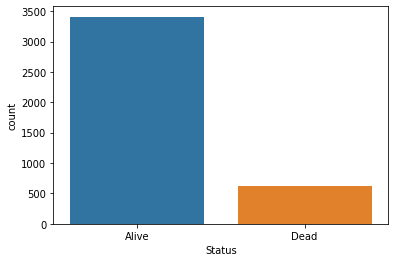

In [288]:
#showing in countplot
sns.countplot(df['Status'])


In [289]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Status']=le.fit_transform(df['Status'])
df['Status']

# 0===ALIVE
# 1===DEAD

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int64

In [290]:
df['Status'].dtypes

dtype('int64')

In [291]:
df['Status'].value_counts()

0    3408
1     616
Name: Status, dtype: int64

In [292]:
#lets Handle with balavced data for Status or Target

df0,df1=df.Status.value_counts()
data_0=df[df['Status']==0]
data_1=df[df['Status']==1]
print(data_1.shape,data_0.shape)


(616, 16) (3408, 16)


In [293]:
#Lets do oversampling method for balancing th data
new_class1=data_1.sample(3000,replace=True)
print(new_class1.shape)
df=pd.concat([data_0,new_class1],axis=0)
df.head()


(3000, 16)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,1,1,1,1,1,1,3,1,4,1,1,24,1,60,0
1,50,1,1,2,2,2,2,2,1,35,1,1,14,5,62,0
2,58,1,2,3,3,3,2,2,1,63,1,1,14,7,75,0
3,58,1,1,1,1,1,1,3,1,18,1,1,2,1,84,0
4,47,1,1,2,1,4,1,3,1,41,1,1,3,1,50,0


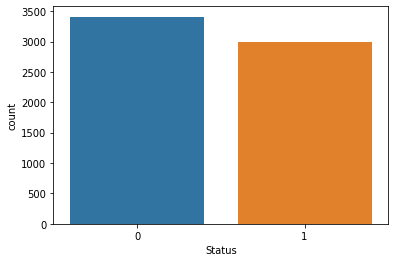

In [294]:
#showing in countplot
sns.countplot(df['Status'])

### 1 is Dead
### 0 is Alive

In [295]:
df.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [296]:
x=df.drop('Status',axis=1)
y=df[['Status']]


In [297]:
## import Essential Libraries from sklearn for training Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix


In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=83,stratify=y)

In [299]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(4485, 15) (1923, 15) (4485, 1) (1923, 1)


In [300]:
#LETS check size of imbalanced data Statuss
print(df['Status'].value_counts())
print(y.value_counts())

0    3408
1    3000
Name: Status, dtype: int64
Status
0         3408
1         3000
dtype: int64


### MODEL TRAIN WITH SUPPORT VECTOR ALGORITHM

In [301]:
#SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC
classifier=SVC()
classifier.fit(x_train,y_train)


SVC()

In [302]:
y_pred=classifier.predict(x_test)
y_pred


array([0, 1, 0, ..., 0, 1, 0])

0.7852314092563702
              precision    recall  f1-score   support

           0       0.77      0.86      0.81      1023
           1       0.81      0.71      0.75       900

    accuracy                           0.79      1923
   macro avg       0.79      0.78      0.78      1923
weighted avg       0.79      0.79      0.78      1923

[[875 148]
 [265 635]]


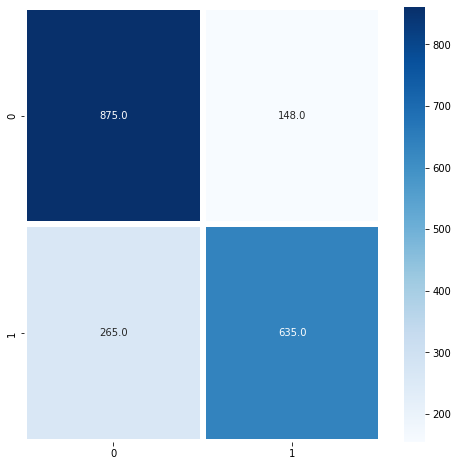

In [303]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

### LOGISTIC REGRESSION ALGORRITHMS

In [304]:
#logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)


LogisticRegression()

In [305]:
y_pred=lr.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

0.7888715548621945
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1023
           1       0.78      0.76      0.77       900

    accuracy                           0.79      1923
   macro avg       0.79      0.79      0.79      1923
weighted avg       0.79      0.79      0.79      1923

[[830 193]
 [213 687]]


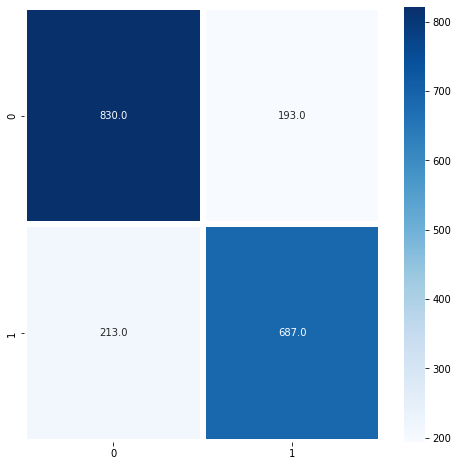

In [306]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

### K-Nearest Neighbor(KNN) Algorithm

In [307]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [308]:
y_pred=kn.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

0.8304732189287571
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1023
           1       0.78      0.89      0.83       900

    accuracy                           0.83      1923
   macro avg       0.83      0.83      0.83      1923
weighted avg       0.84      0.83      0.83      1923

[[798 225]
 [101 799]]


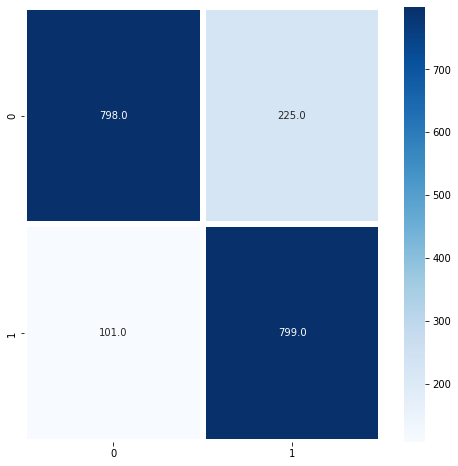

In [309]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

### Naive Bayes Classifier

In [310]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB()
naive.fit(x_train,y_train)

GaussianNB()

In [311]:
y_pred=naive.predict(x_test)
y_pred


array([0, 0, 1, ..., 0, 1, 1])

0.7160686427457098
              precision    recall  f1-score   support

           0       0.69      0.83      0.76      1023
           1       0.76      0.58      0.66       900

    accuracy                           0.72      1923
   macro avg       0.72      0.71      0.71      1923
weighted avg       0.72      0.72      0.71      1923

[[854 169]
 [377 523]]


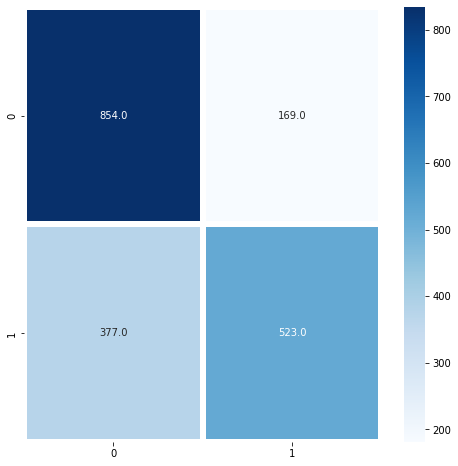

In [312]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

### Decision Tree Classification Algorithm

In [313]:
from sklearn.tree   import DecisionTreeClassifier
dc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [314]:
y_pred=dc.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

0.9261570462818512
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1023
           1       0.88      0.98      0.93       900

    accuracy                           0.93      1923
   macro avg       0.93      0.93      0.93      1923
weighted avg       0.93      0.93      0.93      1923

[[898 125]
 [ 17 883]]


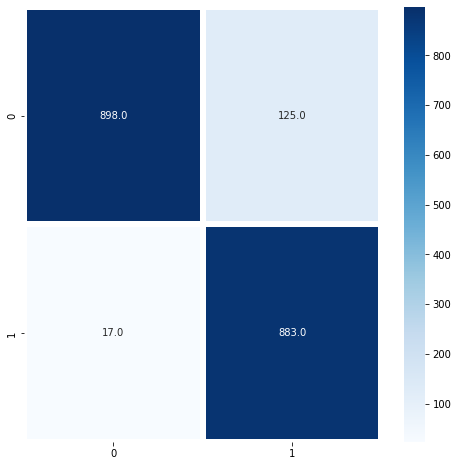

In [315]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

### Machine Learning Random Forest Algorithm

In [316]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier(n_estimators=10)
rc.fit(x_train,y_train)


RandomForestClassifier(n_estimators=10)

In [317]:
y_pred=rc.predict(x_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

0.9537181487259491
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      1023
           1       0.93      0.98      0.95       900

    accuracy                           0.95      1923
   macro avg       0.95      0.96      0.95      1923
weighted avg       0.96      0.95      0.95      1923

[[954  69]
 [ 20 880]]


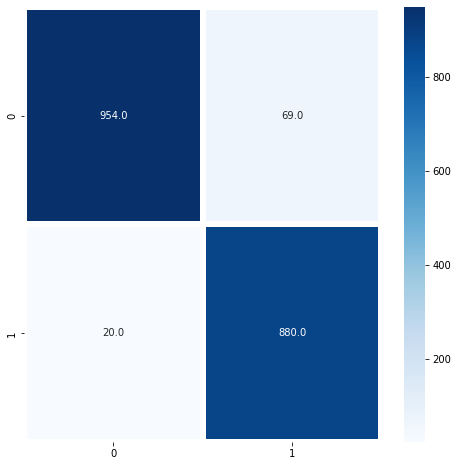

In [318]:
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')

In [319]:

from sklearn.model_selection import cross_val_score
cross_validate=cross_val_score(estimator=rc,X=x_train,y=y_train)
cross_validate

array([0.93979933, 0.94983278, 0.94425864, 0.94314381, 0.95763657])

In [320]:
cross_validate.mean()

0.9469342251950948

In [321]:
#pickle model
import pickle
pickle.dump(rc,open("Breast_cancer.pkl","wb"))
model=pickle.load(open("Breast_cancer.pkl","rb"))

In [322]:
print(model.predict([[69,1,2,3,1,2,1,3,1,90,1,1,4,2,74]]))

[1]


[[954  20]
 [ 69 880]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       974
           1       0.98      0.93      0.95       949

    accuracy                           0.95      1923
   macro avg       0.96      0.95      0.95      1923
weighted avg       0.95      0.95      0.95      1923



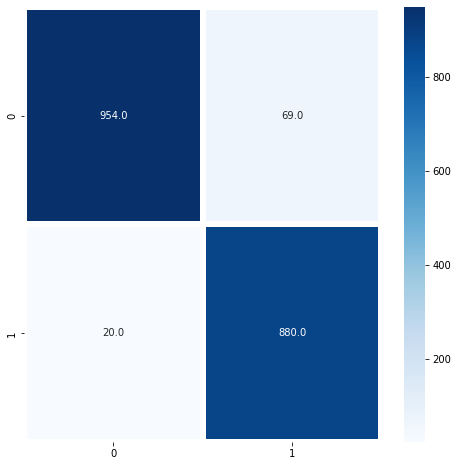

In [323]:
y_pred=model.predict(x_test)
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))
# Plot non-normalized confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,robust=True,linewidths=5,linecolor='white',fmt='.1f',cmap='Blues')